In [1]:
import math
from matplotlib import pyplot as plt

In [2]:
class SOM:
    def winner(self,weights,sample):
        D0 = 0
        D1 = 0
        for i in range(len(sample)):
            D0 = D0 + math.pow((sample[i] - weights[0][i]),2)
            D1 = D1 + math.pow((sample[i] - weights[1][i]),2)
        if D0 < D1:
            return 0
        else:
            return 1
            
    def update(self,weights,sample,J,alpha):
        for i in range(len(sample)):
            weights[J][i] = weights[J][i] + alpha*(sample[i] - weights[J][i])
        return weights

In [3]:
def main():
    X = [
        [1,1,0,0],
        [0,0,0,1],
        [1,0,0,0],
        [0,0,1,1]
    ]
    m,n = len(X),len(X[0])  # Rows and columns
    weights = [
        [0.2,0.6,0.5,0.9],
        [0.8,0.4,0.7,0.3]
    ]
    
    som = SOM()
    epochs = 3
    alpha = 0.5

    for i in range(epochs):
        for j in range(m):
                sample = X[j]
                j = som.winner(weights,sample)
                weights = som.update(weights,sample,j,alpha)
    
    s = [[1,1,0,1]]
    for i in range(len(s)):
        J = som.winner(weights,s[i])
        print("Test Sample Belongs to cluster:",J)
        print("Trained Weights:",weights)

    plot(X,"red",1)

    plot(s,"blue",0.4)

In [22]:
def plot(X,color,alpha):
    plt.subplot(121)
    for i in X:
        for j in range(len(i[0:2])):
            plt.scatter(i[j],i[j+1],c=color,alpha=alpha)
            plt.xlabel("feature 1")
            plt.ylabel("feature 2")
            break

    plt.subplot(122)
    for i in X:
        for j in range(len(i[2:4])):
            plt.scatter(i[j],i[j+1],c=color,alpha=alpha)
            plt.xlabel("feature 3")
            plt.ylabel("feature 4")
            break

    plt.tight_layout()

Test Sample Belongs to cluster: 1
Trained Weights: [[0.003125, 0.009375, 0.6640625, 0.9984375], [0.996875, 0.334375, 0.0109375, 0.0046875]]


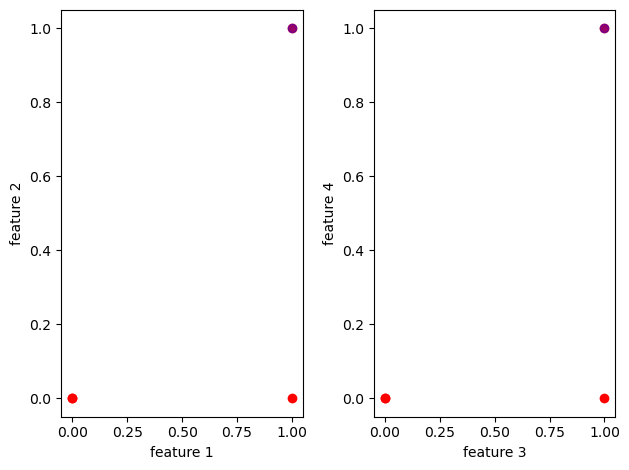

In [23]:
if __name__ == "__main__":
    main()